Load CSVs and Fill Missing Values

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Load CSVs
train_df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")

# Fill missing values
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())


Prepare the Training Data

In [16]:
X_train = train_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
y_train = train_df['SeriousDlqin2yrs']

Prepare the test data: Dropping empty columns

In [17]:
X_test = test_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, errors='ignore')

Training and Predicting

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Original train set
X = train_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
y = train_df['SeriousDlqin2yrs']

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train on resampled data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [29]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate on validation set
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]
y_pred_thresh = (y_val_proba >= 0.4).astype(int)

print("Evaluation on Validation Set:")
print(confusion_matrix(y_val, y_pred_thresh))
print(classification_report(y_val, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_val, y_val_proba))

Evaluation on Validation Set:
[[24455  3540]
 [  855  1150]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     27995
           1       0.25      0.57      0.34      2005

    accuracy                           0.85     30000
   macro avg       0.61      0.72      0.63     30000
weighted avg       0.92      0.85      0.88     30000

ROC AUC: 0.8224074213466156


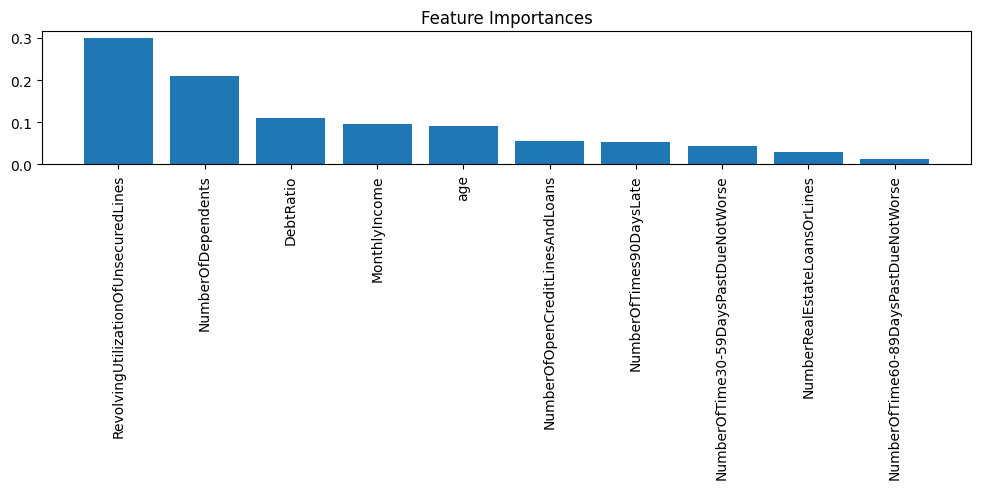

In [31]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
# Predict on test data (which has no labels)
X_test = test_df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, errors='ignore')

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]